## Importing the packages for data analysis

At first sight, we will use four main packages: ```pandas```,``` numpy```, ```matplotlib``` and ``` seaborn```. Let's import these packages using the keyword ``import``. We will change the name from ``pandas`` to ```pd```,```numpy``` to ```np```,```matplotlib``` to ```plt```and ```seaborn``` to ```sns```, using the keyword ``as``.

We will be using the `nltk`, `sklearn`, `collections` and `wordcloud` packages for processing our text component. While we analyze the text, we will be using `sklearn` package again to model our text features.

In [2]:
# General packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from bs4 import BeautifulSoup
import re
import string
from spellchecker import SpellChecker

# NLP packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
import spacy
import gensim


# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

#embeding
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

We will be working with a .csv file that contains information about tens of thousands of customers writing reviews on IMDB movie. In this way, the following attributes are available in the data:

1. **Review (text):** text of the review.
2. **Sentiment (text):** Sentiment of the review (Positive/Negative).

In [3]:
IMDB_reviews = pd.read_csv('IMDB.csv')
IMDB_reviews.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [4]:
good_reviews=IMDB_reviews[IMDB_reviews['sentiment']=='positive']['review']
bad_reviews=IMDB_reviews[IMDB_reviews['sentiment']=='negative']['review']
print("First 5 samples of good reviews\n".format(),good_reviews[:5])
print("First 5 samples of bad reviews\n".format(),bad_reviews[:5])

First 5 samples of good reviews
 0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
4    Petter Mattei's "Love in the Time of Money" is...
5    Probably my all-time favorite movie, a story o...
Name: review, dtype: object
First 5 samples of bad reviews
 3     Basically there's a family where a little boy ...
7     This show was an amazing, fresh & innovative i...
8     Encouraged by the positive comments about this...
10    Phil the Alien is one of those quirky films wh...
11    I saw this movie when I was about 12 when it c...
Name: review, dtype: object


Let's look at the count and graph for each category of the review

Total Counts of both sets positive    25000
negative    25000
Name: sentiment, dtype: int64


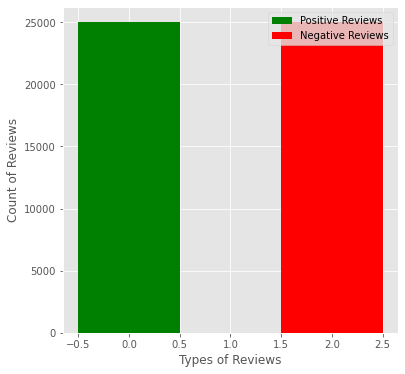

In [5]:
#Count of good and bad reviews
count=IMDB_reviews['sentiment'].value_counts()
print('Total Counts of both sets'.format(),count)

print("==============")
#Creating a function to plot the counts using matplotlib
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_good,width=1,label='Positive Reviews',color='Green')
    plt.legend()
    plt.bar(2,count_bad,width=1,label='Negative Reviews',color='Red')
    plt.legend()
    plt.ylabel('Count of Reviews')
    plt.xlabel('Types of Reviews')
    plt.show()
    
count_good=IMDB_reviews[IMDB_reviews['sentiment']=='positive']
count_bad=IMDB_reviews[IMDB_reviews['sentiment']=='negative']
plot_counts(len(count_good),len(count_bad))

Let's look at the distribution of number of words per review. We will do this by applying a *lambda* function that splits each complete review by spaces, which will give us the seperate words:

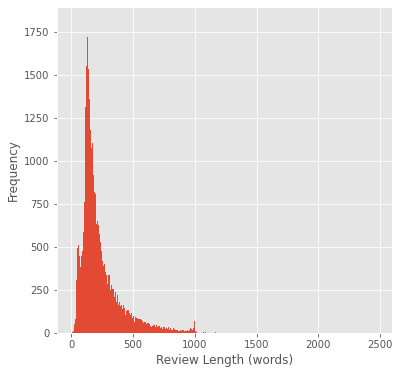

In [15]:
## Getting the number of words by splitting them by a space
words_per_review = IMDB_reviews.review.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 500)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [16]:
print('Average words:', words_per_review.mean())
print('Skewness:', words_per_review.skew())

Average words: 231.14594
Skewness: 2.1682027329400033


We can see that the number of words per user review is highly positive skewed with mean of 231, which means that on average, user reviews have 231 words.

### Text visualization using word clouds (*word clouds* )

As visualization is crucial for numerical data, it is also important for text data. However, the text does not lend itself to histogram charts or scatterplots, as numerical data does. In such cases, the **word clouds** are a common and very useful tool to appreciate the text distribution.

To make a word cloud of the string values of the Seires `data['review']`, we are going to import the `WordCloud`  and join all the text with the `.join()` method:

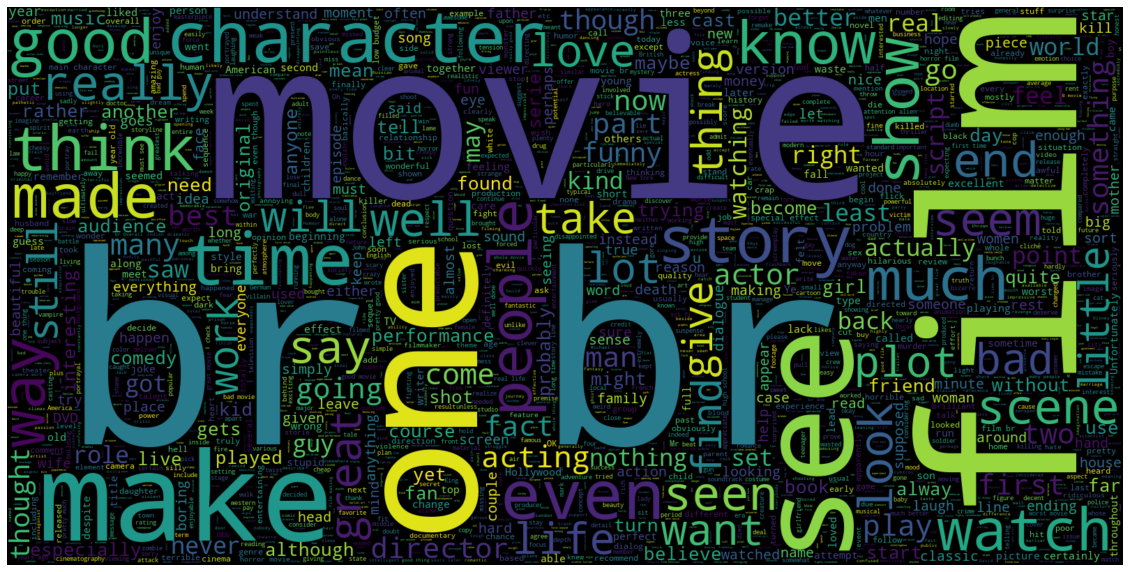

In [22]:
'''stopwords = set(STOPWORDS)
word_cloud_text = ''.join(IMDB_reviews['review'])

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, 
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()'''
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(IMDB_reviews['review']))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show()

The word cloud indicates that many of the reviews talk about - love, character, actor,scene, script,acting. We also see some positive words like good, great, well,best, as well as not desired ones such as br , will and nothing.

Inference From Analysis
The following can be inferred from the data:

The dataset is balanced.
The dataset contains equal number of semantics for reviews of both polarity.
The dataset contains redundant words and html syntaxes.
Punctuations/stopwords are present in a equal distribution in the dataset.
This tells us that we have to do data cleaning!

In [23]:
sentences=IMDB_reviews['review']
#to make 0 and 1 for postive and negative reviews
le=LabelEncoder()
IMDB_reviews['sentiment']= le.fit_transform(IMDB_reviews['sentiment'])
print(IMDB_reviews.head(2))

                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1


### Data visualization using word cloud for finding the most used words for each type of sentiment

(-0.5, 799.5, 799.5, -0.5)

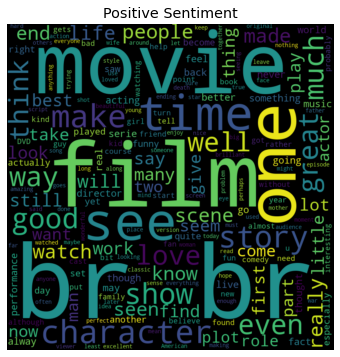

In [24]:
stopwords = set(STOPWORDS)
pos=' '.join(map(str,sentences[IMDB_reviews['sentiment']==1]))
neg=' '.join(map(str,sentences[IMDB_reviews['sentiment']==0]))
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(pos) 

plt.figure()
plt.imshow(wordcloud1,interpolation="bilinear")
plt.title('Positive Sentiment')
plt.axis('off')

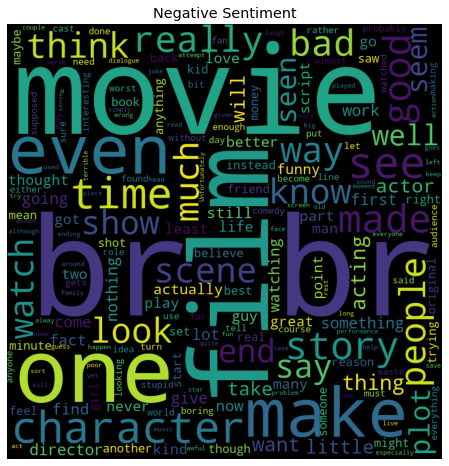

In [25]:
#for negative reviews
plt.figure(figsize=(8,8))
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(neg) 

plt.imshow(wordcloud2)
plt.title('Negative Sentiment')
plt.axis('off')

plt.show()

### Data cleaning

Checking for NA values

In [26]:
IMDB_reviews.isna().sum() 

review       0
sentiment    0
dtype: int64

checking for null values

In [27]:
IMDB_reviews.isnull().sum() 

review       0
sentiment    0
dtype: int64

### Dealing with stop words

In [46]:
stop = set(stopwords.words('english'))


In [41]:
#dont run again
print(IMDB_reviews['review'][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

Dealing with chat words

In [80]:
chat_words_str = """
AFAIK=As Far As I Know
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime Anywhere Anyplace
BTW=By The Way
B4=Before
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great
G9=Genius
IC=I See
IMHO=In My Honest Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ASL=Age, Sex, Location
THX=Thank You
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTG=Way To Go!
W8=Wait
"""

In [81]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)
print(chat_words_list)

{'FAQ', 'BTW', 'FYI', 'LOL', 'W8', 'FWIW', 'GAL', 'OIC', 'U', 'WTG', 'IMO', 'ATK', 'GR8', 'GMTA', 'PITA', 'A3', 'ASL', 'B4', 'G9', 'PRW', 'WB', 'LTNS', 'NRN', 'U4E', 'AFAIK', 'ROFLOL', 'MTE', 'IC', 'GG', 'IMHO', 'ATM', 'M8', 'ROFL', 'L8R', 'THX', 'IRL', 'IOW', 'ASAP', 'FC', 'PRT', 'GN', 'U2'}


In [83]:
def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

Dealing with stop words, html, url, punctuation

In [95]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip().lower())
    return " ".join(final_text)
def remove_punc(text):
    exclude = string.punctuation
    for char in exclude:
        text = text.replace(char,' ')
    return text
## Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
def cleaning(text):
    text=chat_words_conversion(text)
    text = remove_html_tags(text)
    text = remove_url(text)
    text=remove_punc(text)
    text=remove_emoji(text)
    text = remove_stopwords(text)
    
    return text

In [96]:
#test
print(IMDB_reviews['review'].apply(cleaning)[0])

one reviewers mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skil

In [97]:
IMDB_reviews['review'] = IMDB_reviews['review'].apply(cleaning)

### Transforming Corpus

In [116]:
print(IMDB_reviews['review'][0])

one reviewers mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skil

In [117]:
nlp = spacy.load('en_core_web_lg')
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

In [118]:
IMDB_reviews['review'] =  IMDB_reviews['review'].apply(lambda z: lemmatizer(z))

In [119]:
print(IMDB_reviews['review'][0])

one reviewer mention watch 1 oz episode hook right exactly happen first thing strike oz brutality unflinche scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture paint mainstream audience forget charm forget romance oz mess around first episode ever see strike nasty surreal say ready watch develop taste oz got accustom high level graphic violence violence injustice crooked guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may become comfortabl

In [13]:
#saving clean dataset
# saving the dataframe
IMDB_reviews.to_csv('IMDB_reviews_clean.csv',index=False)

NameError: name 'IMDB_reviews' is not defined

In [4]:
#loading the cleaned dataset
df=pd.read_csv("IMDB_reviews_clean.csv")
df.head(10)

,review,sentiment
0,one reviewer mention watch 1 oz episode hook r...,1
1,wonderful little production filming technique ...,1
2,think wonderful way spend time hot summer week...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stunnin...,1
5,probably time favorite movie story selflessnes...,1
6,sure would like see resurrection date seahunt ...,1
7,show amazing fresh innovative idea 70 first ai...,0
8,encourage positive comment film look forward w...,0
9,like original gut wrench laughter like movie y...,1


### Vectorization and Embeddings
##### Vectorize without semantics

In [93]:
X=df['review']
y=df.iloc[:,-1].values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [134]:
#Scikitleran TFIDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer=TfidfVectorizer()
X_train_tfidf=tfidf_transformer.fit_transform(X_train)
X_train_tfidf.shape

(33500, 74537)

##### Trainining with TFIDF vector

In [135]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(X_train_tfidf,y_train)

SVC()

Building a pipeline so that it can be easy for testing

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
text_clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC())])
text_clf.fit(X_train,y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [137]:
#prediction
pred=text_clf.predict(X_test)

In [139]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred))

[[7247  961]
 [ 708 7584]]


In [140]:
#classification report
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      8208
           1       0.89      0.91      0.90      8292

    accuracy                           0.90     16500
   macro avg       0.90      0.90      0.90     16500
weighted avg       0.90      0.90      0.90     16500



In [141]:
#accuracy
print(metrics.accuracy_score(y_test,pred))

0.8988484848484849


In [147]:
print(text_clf.predict(["This is one of the best i have seen"]))

[1]


In [154]:
print(text_clf.predict(["The character are one of the worst actor. Story is terrible"]))

[0]


#### Semantic Embeddings

#### Using glove wiki-gigaword

### Word to vec

In [144]:
embeddings_index = {}

with open('glove.6B.200d.txt',encoding="utf8") as f:
    for line in tqdm(f):
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    
print('Found %s word vectors.' % len(embeddings_index))

400000it [00:20, 19974.44it/s]

Found 400000 word vectors.


In [145]:
def sentence_to_vector(sent,embeddings_dict,stop_words,tokenizer):
    
    #preprocess the text before finding embedding vectors
    lower_sent= str(sent).lower()
    words=tokenizer(lower_sent)
    words = [w for w in words if not w in stop_words]
    
    # keep only alpha-numeric tokens
    words = [w for w in words if w.isalpha()]# isalpha() returns True if all the characters are alphabet letters (a-z).
    
    # initialize empty list to store embeddings
    word_vectors = []
    for w in words:
     # for every word, fetch the embedding from the dictionary and append to list of embeddings
        if w in embeddings_dict:
             word_vectors.append(embeddings_dict[w])

                                 
    if len(word_vectors) == 0:# if we dont have any vectors, return zeros
        return np.zeros(300)
     # convert list of embeddings to array
    word_vectors = np.array(word_vectors)

     # calculate sum over axis=0
    v = word_vectors.sum(axis=0)
    # return normalized vector
    return v / np.sqrt((v ** 2).sum())

In [158]:
# create sentence embeddings
print("Creating sentence vectors")
vectors = []
for review in tqdm(df.review.values):
     vectors.append(sentence_to_vector(sent = review,embeddings_dict = embeddings_index,stop_words = set(stopwords.words('english')), tokenizer = word_tokenize))
vectors = np.array(vectors)

Creating sentence vectors


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:44<00:00, 1127.02it/s]


In [148]:
glove_df=pd.DataFrame(vectors)
glove_df['sentiment_label']=df['sentiment']
glove_df.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,sentiment_label
0,0.071774,0.034984,-0.053184,-0.052182,-0.015790,0.034382,-0.132003,0.035780,0.015770,0.068730,...,0.002221,-0.009708,-0.001443,0.027783,-0.026296,-0.016112,0.048952,-0.044947,0.059514,1
1,0.072404,0.041270,-0.039405,-0.065876,0.000999,-0.012879,-0.120402,0.042426,0.046607,0.004361,...,0.011197,-0.025063,-0.009444,0.076240,-0.038522,-0.004469,0.060298,-0.025631,0.053057,1
2,0.096023,0.006975,-0.082927,-0.079306,0.000655,-0.001846,-0.125133,0.013855,0.026730,0.053071,...,-0.007735,-0.015563,-0.024934,0.058365,-0.018088,0.001274,0.051011,-0.028835,0.062474,1
3,0.065398,0.066119,-0.084718,-0.078386,-0.007882,-0.004866,-0.080443,-0.003031,0.018198,0.054509,...,-0.062380,-0.053635,-0.049462,0.047639,-0.040899,0.005427,0.046983,-0.001064,0.064278,0
4,0.064585,0.054896,-0.030601,-0.047336,0.014344,0.012783,-0.126916,0.026200,0.029684,0.055550,...,0.003327,-0.041291,-0.005984,0.052394,-0.023326,0.024349,0.034946,-0.030839,0.019194,1


In [149]:
X_train_embed, X_test_embed, y_train_embed, y_test_embed = train_test_split(vectors,y,test_size = 0.2,random_state = 0)

In [153]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(solver='liblinear')

In [154]:
clf.fit(X_train_embed,y_train_embed)

LogisticRegression(solver='liblinear')

In [156]:
#prediction
from sklearn import metrics
pred_embed=clf.predict(X_test_embed)
print(metrics.confusion_matrix(y_test_embed,pred_embed))
print(metrics.classification_report(y_test_embed,pred_embed))
#accuracy
print(metrics.accuracy_score(y_test_embed,pred_embed))

[[4095  940]
 [ 918 4047]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      5035
           1       0.81      0.82      0.81      4965

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

0.8142


In [171]:
test="The cast is horrible. Despite having great scene, the actor acting is flop "
test_vec=[sentence_to_vector(sent = test,embeddings_dict = embeddings_index,stop_words = set(stopwords.words('english')), tokenizer = word_tokenize)]
clf.predict(test_vec)

array([0], dtype=int64)